In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.probability import FreqDist
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
fdist = FreqDist()
lemmatizer = WordNetLemmatizer()

## creating dictionaries 

In [3]:
dict_of_signs = {}
for sign in ["Aries","Taurus", "Gemini", "Cancer","Leo","Virgo","Libra"\
             ,"Scorpio","Sagittarius","Capricorn","Aquarius","Pisces"]:
    dict_of_signs[sign] = open("{}.txt".format(sign),"r").read()

In [4]:
dict_of_pers = {}
for pers in ["adventurers","advocates","architects","campaigners",\
             "commanders","consuls","debaters","defenders",\
             "entertainers","entrepreneurs","executives","logicians",\
             "logisticians","mediators","protagonists","virtuosos"]:
    dict_of_pers[pers] = open("{}.txt".format(pers),"r").read()

## tokenizing

In [5]:
signs_token_sent = {}
for key in dict_of_signs.keys():
    signs_token_sent[key] = sent_tokenize(dict_of_signs[key])

In [6]:
pers_token_sent = {}
for key in dict_of_pers.keys():
    pers_token_sent[key] = sent_tokenize(dict_of_pers[key])

In [7]:
dict_of_signs_token = {}
for key in dict_of_signs.keys():
    text = word_tokenize(dict_of_signs[key])
    dict_of_signs_token[key] = nltk.Text(text)

In [8]:
dict_of_pers_token = {}
for key in dict_of_pers.keys():
    text = word_tokenize(dict_of_pers[key])
    dict_of_pers_token[key] = nltk.Text(text)
    

## lemmatizing

In [9]:
dict_of_signs_lemma = {}
for key in dict_of_signs_token.keys():
    text = []
    for i in range(0,len(dict_of_signs_token[key])):
        word = dict_of_signs_token[key][i]
        add_to_text = lemmatizer.lemmatize(word)
        text.append(add_to_text)
    dict_of_signs_lemma[key] = nltk.Text(text)

In [10]:
dict_of_pers_lemma = {}
for key in dict_of_pers_token.keys():
    text = []
    for i in range(0,len(dict_of_pers_token[key])):
        word = dict_of_pers_token[key][i]
        add_to_text = lemmatizer.lemmatize(word)
        text.append(add_to_text)
    dict_of_pers_lemma[key] = nltk.Text(text)

## Lexical diversity

In [12]:
words_list = []

for key in dict_of_signs_lemma.keys():
    words_list.append(
        {
            "name":dict_of_signs_lemma[key][0],
            "words total":len(dict_of_signs_lemma[key]),
            "unique words":len(set(dict_of_signs_lemma[key])),
            "lexical diversity": len(set(dict_of_signs_lemma[key]))/len(dict_of_signs_lemma[key])
        }
    )
pd.DataFrame(words_list)

lexical diversity          name  unique words  words total
0            0.170302        ﻿Aries          3857        22648
1            0.182636       ﻿Taurus          4022        22022
2            0.176646       ﻿Gemini          3564        20176
3            0.174695       ﻿Cancer          3975        22754
4            0.191558          ﻿Leo          3490        18219
5            0.186810        ﻿Virgo          3606        19303
6            0.169308        ﻿Libra          4006        23661
7            0.176713       Scorpio          3858        21832
8            0.179146  ﻿Sagittarius          3706        20687
9            0.201949    ﻿Capricorn          3772        18678
10           0.179415     ﻿Aquarius          4140        23075
11           0.184343       ﻿Pisces          3876        21026

In [13]:
words_list_pers = []

for key in dict_of_pers_lemma.keys():
    words_list_pers.append(
        {
            "name":dict_of_pers_lemma[key][0],
            "words total":len(dict_of_pers_lemma[key]),
            "unique words":len(set(dict_of_pers_lemma[key])),
            "lexical diversity": len(set(dict_of_pers_lemma[key]))/len(dict_of_pers_lemma[key])
        
        }
    )
pd.DataFrame(words_list_pers)

lexical diversity          name  unique words  words total
0            0.261507    adventurer          1142         4367
1            0.239901      advocate          1164         4852
2            0.226458     architect          1402         6191
3            0.257995    campaigner          1315         5097
4            0.256921     commander          1225         4768
5            0.260208        consul          1077         4139
6            0.258817       debater          1343         5189
7            0.260060      defender          1215         4672
8            0.257968   entertainer          1117         4330
9            0.273553  entrepreneur          1144         4182
10           0.270063     executive          1161         4299
11           0.261003      logician          1358         5203
12           0.261368   logistician          1276         4882
13           0.253607      mediator          1283         5059
14           0.263099   protagonist          1180         4485
15           0.258367      virtuoso          1158         4482

## tagging
## BI-, TRI-, N-GRAMS

In [ ]:
freq = nltk.FreqDist(nltk.Text(bigrams_list)).most_common(50)
freq

In [15]:
signs_trigrams = {}
for key in dict_of_signs_token.keys():
    
    words = dict_of_signs_token[key]
    tagged = nltk.pos_tag(words)

    trigrams_list = []

    for (w1,t1), (w2,t2), (w3,t3) in list(nltk.trigrams(tagged)):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            element = w1 + ' ' + w2 + ' ' + w3
            trigrams_list.append(element)
            
    signs_trigrams[key] = trigrams_list

pers_trigrams = {}
for key in dict_of_pers_token.keys():
    
    words = dict_of_pers_token[key]
    tagged = nltk.pos_tag(words)

    trigrams_list = []

    for (w1,t1), (w2,t2), (w3,t3) in list(nltk.trigrams(tagged)):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            element = w1 + ' ' + w2 + ' ' + w3
            trigrams_list.append(element)
            
    pers_trigrams[key] = trigrams_list


In [17]:
pers_bigrams = {}
for key in dict_of_pers_token.keys():

    words = dict_of_pers_token[key]
    tagged = nltk.pos_tag(words)

    bigrams_list = []

    for (w1,t1), (w2,t2) in list(nltk.bigrams(tagged)):
        if (t1.startswith('JJ') and t2.startswith('NN')):
            element = w1 + ' ' + w2
            bigrams_list.append(element)
            
    pers_bigrams[key] = bigrams_list

sign_bigrams = {}
for key in dict_of_signs_token.keys():

    words = dict_of_signs_token[key]
    tagged = nltk.pos_tag(words)

    bigrams_list = []

    for (w1,t1), (w2,t2) in list(nltk.bigrams(tagged)):
        if (t1.startswith('JJ') and t2.startswith('NN')):
            element = w1 + ' ' + w2
            bigrams_list.append(element)
            
    sign_bigrams[key] = bigrams_list

In [82]:
sign_ngrams_vtovn = {}
for key in dict_of_signs_token.keys():
    words = dict_of_signs_token[key]
    tagged = nltk.pos_tag(words)

    ngrams_list = []

    for (w1,t1), (w2,t2), (w3,t3), (w4,t4) in list(nltk.ngrams(tagged,4)):
        if (t1.startswith('V' or 'J') and t2 == 'TO' and t3.startswith('V'))\
        and t4.startswith('N'):
            element = w1 + ' ' + w2 + ' ' + w3 + ' ' + w4
            ngrams_list.append(element)
            
    sign_ngrams_vtovn[key] = ngrams_list
    
pers_ngrams_vtovn = {}
for key in dict_of_pers_token.keys():
    words = dict_of_pers_token[key]
    tagged = nltk.pos_tag(words)

    ngrams_list = []

    for (w1,t1), (w2,t2), (w3,t3), (w4,t4) in list(nltk.ngrams(tagged,4)):
        if (t1.startswith('V' or 'J') and t2 == 'TO' and t3.startswith('V'))\
        and t4.startswith('N'):
            element = w1 + ' ' + w2 + ' ' + w3 + ' ' + w4
            ngrams_list.append(element)
            
    pers_ngrams_vtovn[key] = ngrams_list


### ez volt számomra az egyik legszórakoztatóbb rész.
### némelyik 4 tagú ngram értelmetlen/ hiányos (pl. Ariesnél 2. sorban vélhetően "never" fails to surprise people volt az eredeti)
### azonban sok beszédes ngramot is találtam

#### pl. Leo - refuse to accept failure, Gemini - seems to be contradictory/tend to hate boredom

In [301]:
key_n = []
for key in sign_ngrams_vtovn.keys():
    lista = sign_ngrams_vtovn[key]
    for i in range(0,len(sign_ngrams_vtovn[key])):
        key_n.append(
        {
            'name': key,
            'ngram': lista[i]
        }
        )
    pd.DataFrame(key_n)
#print(pd.DataFrame(key_n).tail())
#print(pd.DataFrame(key_n).tail())

key_n2 = []
for key in pers_ngrams_vtovn.keys():
    lista = pers_ngrams_vtovn[key]
    for i in range(0,len(pers_ngrams_vtovn[key])):
        key_n2.append(
        {
            'name': key,
            'ngram': lista[i]
        }
        )
    pd.DataFrame(key_n2)
#print(pd.DataFrame(key_n2).head())
#print(pd.DataFrame(key_n2).tail())

In [183]:
sign_adj = {}
for key in dict_of_signs_token.keys():
    words = dict_of_signs_token[key]
    tagged = nltk.pos_tag(words)

    adj_list = []

    for (w1,t1) in list(tagged):
        if (t1.startswith('J') and len(w1) > 4):
            element = w1
            adj_list.append(element)
            
    sign_adj[key] = adj_list
    
pers_adj = {}
for key in dict_of_pers_token.keys():
    words = dict_of_pers_token[key]
    tagged = nltk.pos_tag(words)

    adj_list = []

    for (w1,t1) in list(tagged):
        if (t1.startswith('J') and len(w1) > 4):
            element = w1
            adj_list.append(element)
            
    pers_adj[key] = adj_list

## Melyik jegy melyik személyiségtípussal egyezik leginkább a szövegben szereplő melléknevek alapján? 
### először a személyiségtípusokhoz egyeztetem a jegyeket

##### az első cellában látható a kódnak a 'magja':

In [156]:
for sign in sign_adj.keys():
    for pers in pers_adj.keys():
        
        a = sign_adj[sign]
        b = pers_adj[pers]
        common = set(a) & set(b)
        number = len(set(a) & set(b))

adventurers and Aries
86
Least matching personality was: 70 with Gemini


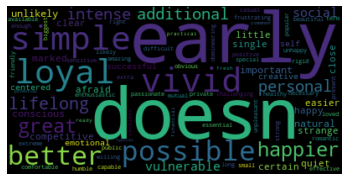

advocates and Aries
86
Least matching personality was: 64 with Gemini


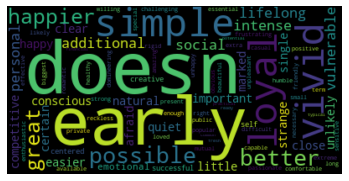

architects and Aries
97
Least matching personality was: 64 with Gemini


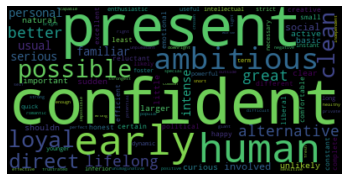

campaigners and Aries
97
Least matching personality was: 64 with Gemini


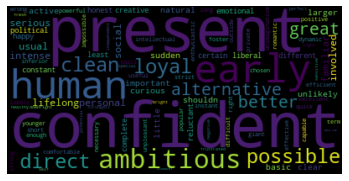

commanders and Aries
97
Least matching personality was: 64 with Gemini


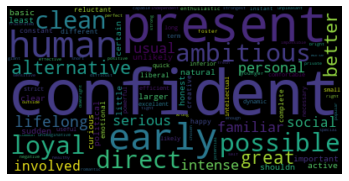

consuls and Aries
97
Least matching personality was: 64 with Gemini


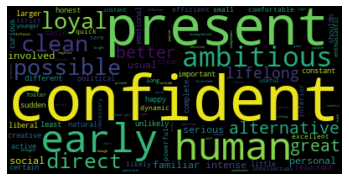

debaters and Aries
97
Least matching personality was: 64 with Gemini


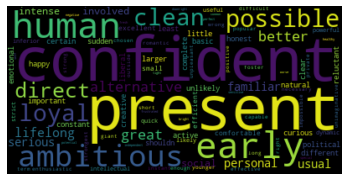

defenders and Aries
97
Least matching personality was: 64 with Gemini


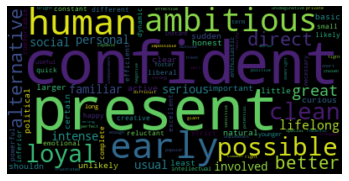

entertainers and Aries
97
Least matching personality was: 60 with Leo


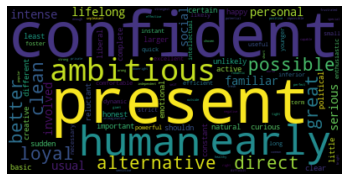

entrepreneurs and Aries
97
Least matching personality was: 60 with Leo


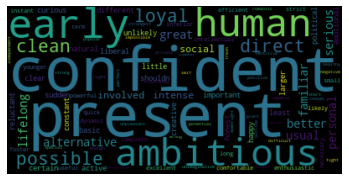

executives and Aries
97
Least matching personality was: 60 with Leo


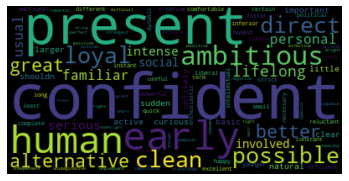

logicians and Aquarius
108
Least matching personality was: 60 with Leo


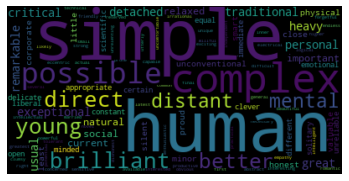

logisticians and Aquarius
108
Least matching personality was: 60 with Leo


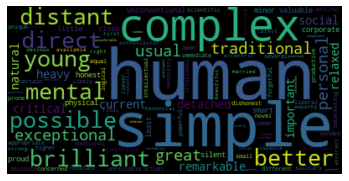

mediators and Aquarius
108
Least matching personality was: 60 with Leo


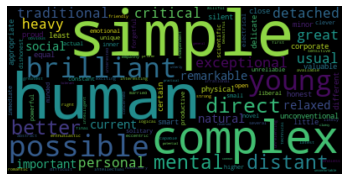

protagonists and Aquarius
108
Least matching personality was: 57 with Leo


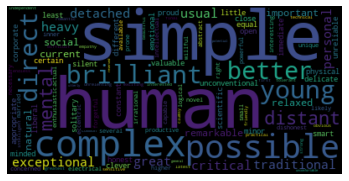

virtuosos and Aquarius
108
Least matching personality was: 57 with Leo


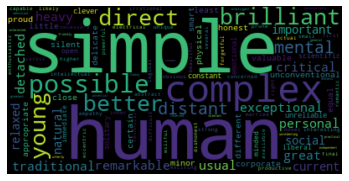

In [184]:
common_words_number = []
common_words = []
currentsign = []
for pers in pers_adj.keys():
    for sign in sign_adj.keys():

        a = sign_adj[sign]
        b = pers_adj[pers]
        common = set(a) & set(b)
        number = len(set(a) & set(b))
        common_words_number.append(number)
        common_words.append((set(a) & set(b)))
        currentsign.append(sign)
        index = common_words_number.index(max(common_words_number))
        best_match = currentsign[index]
        best_match_adj = list(common_words[index])
        index2 = common_words_number.index(min(common_words_number))
        worst_match = currentsign[index2]

    for_cloud = '' 
    for i in range(0,len(best_match_adj)):
        if len(best_match_adj[i]) > 3:
            for_cloud += best_match_adj[i] + ' '

    print(pers ,'and', best_match)
    print(max(common_words_number))
    print('Least matching personality was:', min(common_words_number), 'with', worst_match )
    wordcloud = WordCloud().generate(for_cloud)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


### majd a jegyekhez a személyiségtípusokat:

Aries and architects
97
Least matching personality was: 75 with protagonists


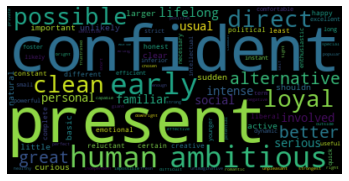

Taurus and architects
97
Least matching personality was: 64 with protagonists


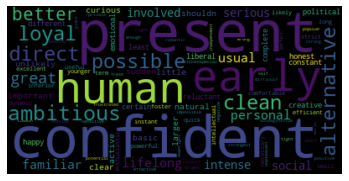

Gemini and architects
97
Least matching personality was: 63 with protagonists


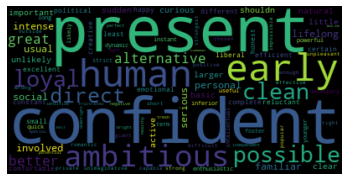

Cancer and architects
97
Least matching personality was: 63 with protagonists


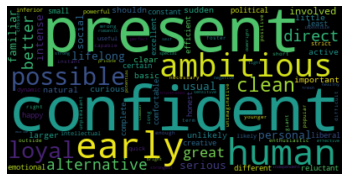

Leo and architects
97
Least matching personality was: 57 with protagonists


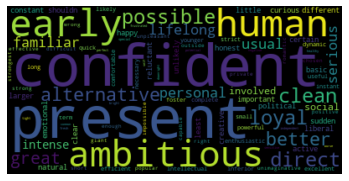

Virgo and architects
97
Least matching personality was: 57 with protagonists


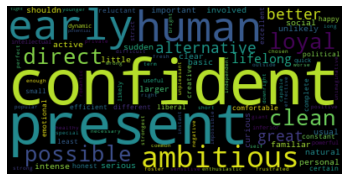

Libra and architects
97
Least matching personality was: 57 with protagonists


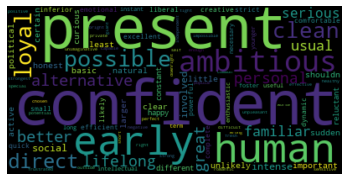

Scorpio and architects
97
Least matching personality was: 57 with protagonists


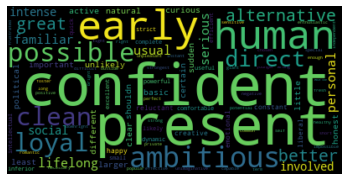

Sagittarius and architects
97
Least matching personality was: 57 with protagonists


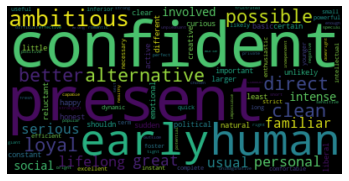

Capricorn and architects
97
Least matching personality was: 57 with protagonists


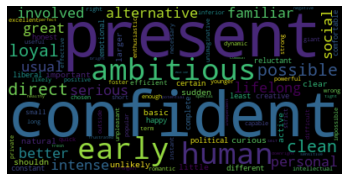

Aquarius and logicians
108
Least matching personality was: 57 with protagonists


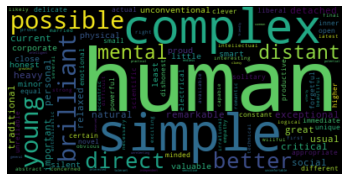

Pisces and logicians
108
Least matching personality was: 57 with protagonists


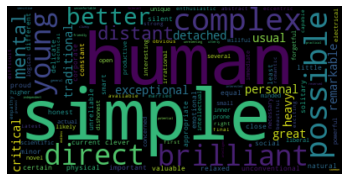

In [185]:
common_words_number = []
common_words = []
currentpers = []
for sign in sign_adj.keys():
    for pers in pers_adj.keys():

        a = sign_adj[sign]
        b = pers_adj[pers]
        common = set(a) & set(b)
        number = len(set(a) & set(b))
        common_words_number.append(number)
        common_words.append((set(a) & set(b)))
        currentpers.append(pers)
        index = common_words_number.index(max(common_words_number))
        best_match = currentpers[index]
        best_match_adj = list(common_words[index])
        index2 = common_words_number.index(min(common_words_number))
        worst_match = currentpers[index2]

    for_cloud = ''
    for i in range(0,len(best_match_adj)):
        if len(best_match_adj[i]) > 3:
            for_cloud += best_match_adj[i] + ' '

    print(sign ,'and', best_match)
    print(max(common_words_number))
    print('Least matching personality was:', min(common_words_number), 'with', worst_match )
    wordcloud = WordCloud().generate(for_cloud)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



### amint látható, van amit többször is megtalált, szóval nem mindenkit rakott párba. 
### ezt az alábbiakban orvoslom:

#### 1) jobban szűröm a mellékneveket, azaz csak a 6 karakternél hosszabbakat veszem bele az adatba. ettől azt remélem, hogy értékesebb lesz a szavak jelentéstartalma.

In [244]:
sign_adj_filt = {}
for key in dict_of_signs_token.keys():
    words = dict_of_signs_token[key]
    tagged = nltk.pos_tag(words)

    adj_list = []

    for (w1,t1) in list(tagged):
        if (t1.startswith('J') and len(w1) > 6):
            element = w1
            adj_list.append(element)
            
    sign_adj_filt[key] = adj_list
    
pers_adj_filt = {}
for key in dict_of_pers_token.keys():
    words = dict_of_pers_token[key]
    tagged = nltk.pos_tag(words)

    adj_list = []

    for (w1,t1) in list(tagged):
        if (t1.startswith('J') and len(w1) > 6):
            element = w1
            adj_list.append(element)
            
    pers_adj_filt[key] = adj_list

#### több szótípust, szókapcsolatot is beveszek. az alábbiakban a főnevekre szűrök:

In [250]:
sign_noun = {}
for key in dict_of_signs_token.keys():
    words = dict_of_signs_token[key]
    tagged = nltk.pos_tag(words)

    adj_list = []

    for (w1,t1) in list(tagged):
        if (t1.startswith('N') and len(w1) > 5):
            element = w1
            adj_list.append(element)
            
    sign_noun[key] = adj_list
    
pers_noun = {}
for key in dict_of_pers_token.keys():
    words = dict_of_pers_token[key]
    tagged = nltk.pos_tag(words)

    adj_list = []

    for (w1,t1) in list(tagged):
        if (t1.startswith('N') and len(w1) > 5):
            element = w1
            adj_list.append(element)
            
    pers_noun[key] = adj_list

#### verbs + nouns bigramokra szűrök (pl. loves animals, question dogmas)

In [287]:
pers_bigrams_vn = {}
for key in dict_of_pers_token.keys():

    words = dict_of_pers_token[key]
    tagged = nltk.pos_tag(words)

    bigrams_list = []

    for (w1,t1), (w2,t2) in list(nltk.bigrams(tagged)):
        if (t1.startswith('V') and t2.startswith('N')):
            element = w1 + ' ' + w2
            bigrams_list.append(element)
            
    pers_bigrams_vn[key] = bigrams_list

sign_bigrams_vn = {}
for key in dict_of_signs_token.keys():

    words = dict_of_signs_token[key]
    tagged = nltk.pos_tag(words)

    bigrams_list = []

    for (w1,t1), (w2,t2) in list(nltk.bigrams(tagged)):
        if (t1.startswith('V') and t2.startswith('N')):
            element = w1 + ' ' + w2
            bigrams_list.append(element)
            
    sign_bigrams_vn[key] = bigrams_list
    

## itt történik a 'párosítás'
#### szeretném megjegyezni, hogy feltehetően szofisztikáltabbá tette a programot, hogy többféle szókapcsolatot is bevettem (végül 6 félét, ennek egy része a kódom fentebbi része tartalmazza) 
#### mindenesetre a végső megoldás az volt, hogy miután megtalál egy legjobb matchet, az illető párt kidobja a "currentsign" listából, vagyis utána már nem lehet vele matchelni. ez nem biztosítja 100%-ig a legjobb matchek megtalálását 

adventurers and Virgo
216
Least matching personality was: 177 with Leo


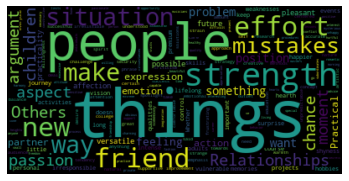

further matches:
210 with Aries
197 with Taurus
192 with Gemini
194 with Cancer
177 with Leo
216 with Virgo
215 with Libra
205 with Scorpio
201 with Sagittarius
191 with Capricorn
213 with Aquarius
207 with Pisces
*********************************************************
 
advocates and Aries
222
Least matching personality was: 177 with Leo


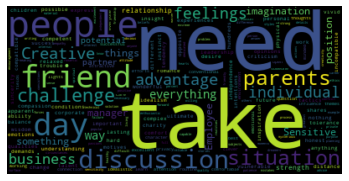

further matches:
208 with Aries
185 with Taurus
188 with Gemini
183 with Cancer
177 with Leo
194 with Libra
210 with Scorpio
209 with Sagittarius
189 with Capricorn
188 with Aquarius
215 with Pisces
222 with Aries
*********************************************************
 
architects and Aries
270
Least matching personality was: 223 with Leo


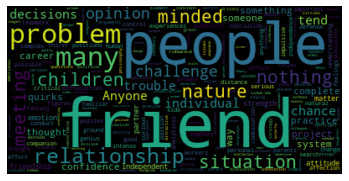

further matches:
246 with Taurus
237 with Gemini
234 with Cancer
223 with Leo
225 with Libra
251 with Scorpio
254 with Sagittarius
249 with Capricorn
227 with Aquarius
227 with Pisces
270 with Aries
232 with Taurus
*********************************************************
 
campaigners and Taurus
241
Least matching personality was: 197 with Libra


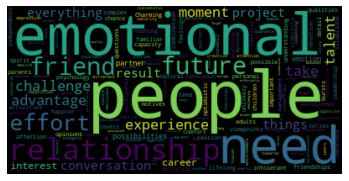

further matches:
241 with Taurus
209 with Gemini
227 with Cancer
210 with Leo
197 with Libra
217 with Scorpio
222 with Sagittarius
227 with Capricorn
209 with Aquarius
217 with Pisces
229 with Taurus
236 with Gemini
*********************************************************
 
commanders and Gemini
216
Least matching personality was: 175 with Libra


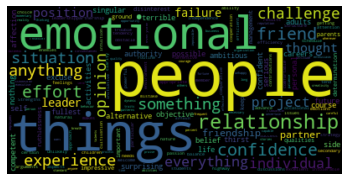

further matches:
216 with Gemini
183 with Cancer
187 with Leo
175 with Libra
190 with Scorpio
201 with Sagittarius
195 with Capricorn
209 with Aquarius
175 with Pisces
205 with Taurus
211 with Gemini
193 with Cancer
*********************************************************
 
consuls and Cancer
216
Least matching personality was: 181 with Taurus


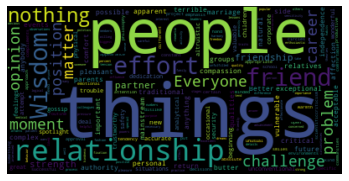

further matches:
207 with Cancer
199 with Leo
184 with Libra
184 with Scorpio
191 with Sagittarius
213 with Capricorn
212 with Aquarius
204 with Pisces
181 with Taurus
199 with Gemini
216 with Cancer
213 with Leo
*********************************************************
 
debaters and Leo
233
Least matching personality was: 183 with Capricorn


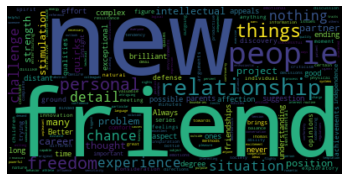

further matches:
223 with Leo
207 with Libra
216 with Scorpio
194 with Sagittarius
183 with Capricorn
200 with Aquarius
228 with Pisces
210 with Taurus
197 with Gemini
214 with Cancer
233 with Leo
213 with Virgo
*********************************************************
 
defenders and Pisces
240
Least matching personality was: 200 with Cancer


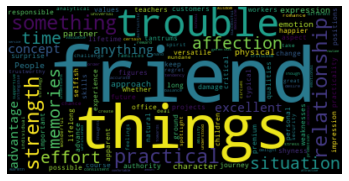

further matches:
220 with Libra
217 with Scorpio
213 with Sagittarius
206 with Capricorn
202 with Aquarius
240 with Pisces
225 with Taurus
219 with Gemini
200 with Cancer
208 with Leo
239 with Virgo
228 with Libra
*********************************************************
 
entertainers and Libra
214
Least matching personality was: 182 with Capricorn


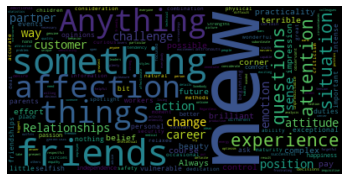

further matches:
206 with Libra
212 with Scorpio
204 with Sagittarius
182 with Capricorn
188 with Aquarius
206 with Taurus
199 with Gemini
203 with Cancer
203 with Leo
188 with Virgo
214 with Libra
198 with Scorpio
*********************************************************
 
entrepreneurs and Scorpio
232
Least matching personality was: 184 with Taurus


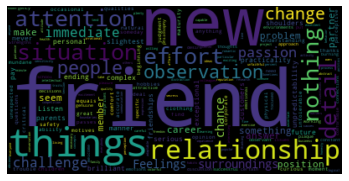

further matches:
213 with Scorpio
202 with Sagittarius
201 with Capricorn
185 with Aquarius
184 with Taurus
206 with Gemini
211 with Cancer
211 with Leo
199 with Virgo
194 with Libra
232 with Scorpio
216 with Sagittarius
*********************************************************
 
executives and Sagittarius
206
Least matching personality was: 176 with Libra


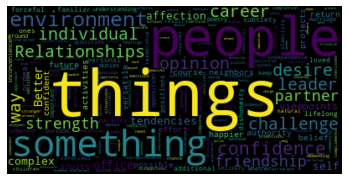

further matches:
206 with Sagittarius
200 with Capricorn
182 with Aquarius
186 with Taurus
184 with Gemini
192 with Cancer
192 with Leo
197 with Virgo
176 with Libra
195 with Scorpio
206 with Sagittarius
199 with Capricorn
*********************************************************
 
logicians and Capricorn
251
Least matching personality was: 189 with Scorpio


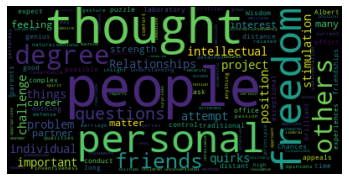

further matches:
210 with Capricorn
210 with Aquarius
219 with Taurus
193 with Gemini
193 with Cancer
213 with Leo
225 with Virgo
229 with Libra
189 with Scorpio
216 with Sagittarius
251 with Capricorn
229 with Aquarius
*********************************************************
 
logisticians and Virgo
221
Least matching personality was: 171 with Leo


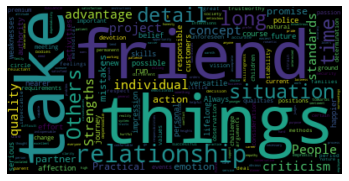

further matches:
214 with Aquarius
208 with Taurus
191 with Gemini
182 with Cancer
171 with Leo
221 with Virgo
199 with Libra
204 with Scorpio
194 with Sagittarius
213 with Capricorn
212 with Aquarius
203 with Pisces
*********************************************************
 
mediators and Aries
235
Least matching personality was: 173 with Leo


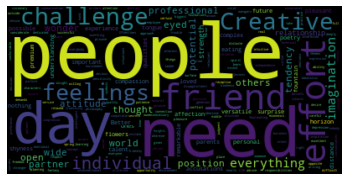

further matches:
202 with Aquarius
202 with Taurus
193 with Gemini
184 with Cancer
173 with Leo
210 with Libra
230 with Scorpio
214 with Sagittarius
195 with Capricorn
212 with Aquarius
213 with Pisces
235 with Aries
*********************************************************
 
protagonists and Libra
220
Least matching personality was: 179 with Cancer


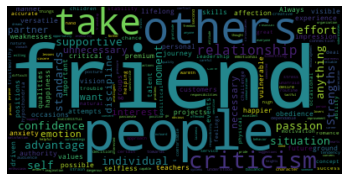

further matches:
215 with Aquarius
199 with Taurus
188 with Gemini
179 with Cancer
184 with Leo
220 with Libra
210 with Scorpio
211 with Sagittarius
184 with Capricorn
197 with Aquarius
206 with Pisces
207 with Taurus
*********************************************************
 
virtuosos and Taurus
210
Least matching personality was: 169 with Leo


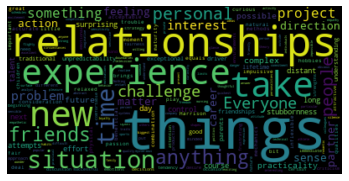

further matches:
205 with Aquarius
206 with Taurus
201 with Gemini
172 with Cancer
169 with Leo
197 with Scorpio
199 with Sagittarius
195 with Capricorn
194 with Aquarius
200 with Pisces
210 with Taurus
195 with Gemini
*********************************************************
 


In [278]:
pairs = []
currentsign = []
for pers in pers_bigrams.keys():
    common_words_number = []
    common_words = []
    for sign in sign_bigrams.keys():

        a = sign_bigrams[sign] + sign_adj_filt[sign] + sign_bigrams_jn[sign]\
        + sign_noun[sign] + signs_trigrams[sign] + sign_bigrams_vn[sign]
        b = pers_bigrams[pers] + pers_adj_filt[pers] + pers_bigrams_jn[pers]\
        + pers_noun[pers] + pers_trigrams[pers] + pers_bigrams_vn[pers]
        common = set(a) & set(b)
        number = len(set(a) & set(b))
        common_words_number.append(number)
        common_words.append((set(a) & set(b)))
        currentsign.append(sign)
        index = common_words_number.index(max(common_words_number))
        best_match = currentsign[index]
        best_match_adj = list(common_words[index])
        index2 = common_words_number.index(min(common_words_number))
        worst_match = currentsign[index2]

    for_cloud = '' 
    for i in range(0,len(best_match_adj)):
        if len(best_match_adj[i]) > 3:
            for_cloud += best_match_adj[i] + ' '
            


    print(pers ,'and', best_match)
    print(max(common_words_number))
    print('Least matching personality was:', min(common_words_number), 'with', worst_match )
    wordcloud = WordCloud().generate(for_cloud)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('further matches:')
    for i in range(0,len(common_words_number)):
        print(common_words_number[i], 'with', currentsign[i])
        
    print('*********************************************************')
    print(' ')
    currentsign.remove(best_match)
    pairs.append(
    {
        "personality type": pers,
        "zodiac sign": best_match
        
        
    }
    )


Aries and architects
246
Least matching personality was: 202 with mediators


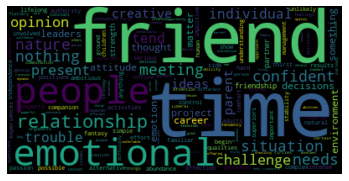

further matches:
210 with adventurers
208 with advocates
246 with architects
241 with campaigners
216 with commanders
207 with consuls
223 with debaters
220 with defenders
206 with entertainers
213 with entrepreneurs
206 with executives
210 with logicians
214 with logisticians
202 with mediators
215 with protagonists
205 with virtuosos
*********************************************************
 
Taurus and campaigners
237
Least matching personality was: 183 with consuls


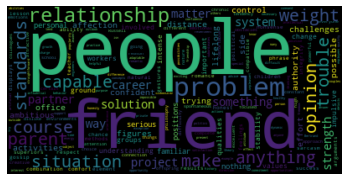

further matches:
197 with adventurers
185 with advocates
237 with campaigners
209 with commanders
183 with consuls
199 with debaters
207 with defenders
217 with entertainers
212 with entrepreneurs
202 with executives
200 with logicians
210 with logisticians
208 with mediators
202 with protagonists
199 with virtuosos
206 with adventurers
*********************************************************
 
Gemini and commanders
234
Least matching personality was: 182 with logisticians


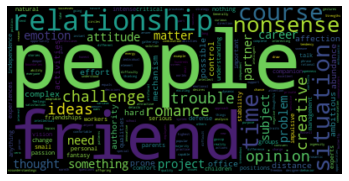

further matches:
192 with adventurers
188 with advocates
234 with commanders
227 with consuls
187 with debaters
184 with defenders
216 with entertainers
213 with entrepreneurs
204 with executives
201 with logicians
182 with logisticians
219 with mediators
191 with protagonists
193 with virtuosos
188 with adventurers
201 with advocates
*********************************************************
 
Cancer and consuls
223
Least matching personality was: 172 with architects


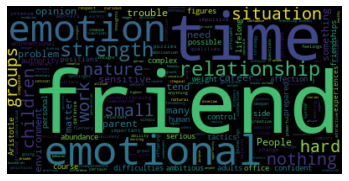

further matches:
194 with adventurers
183 with advocates
223 with consuls
210 with debaters
175 with defenders
184 with entertainers
194 with entrepreneurs
206 with executives
182 with logicians
185 with logisticians
186 with mediators
193 with protagonists
182 with virtuosos
184 with adventurers
179 with advocates
172 with architects
*********************************************************
 
Leo and debaters
225
Least matching personality was: 169 with campaigners


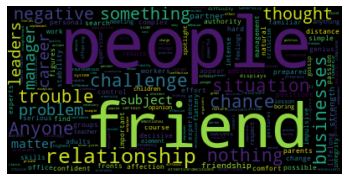

further matches:
177 with adventurers
177 with advocates
225 with debaters
197 with defenders
190 with entertainers
191 with entrepreneurs
183 with executives
202 with logicians
188 with logisticians
184 with mediators
184 with protagonists
193 with virtuosos
171 with adventurers
173 with advocates
184 with architects
169 with campaigners
*********************************************************
 
Virgo and defenders
251
Least matching personality was: 192 with virtuosos


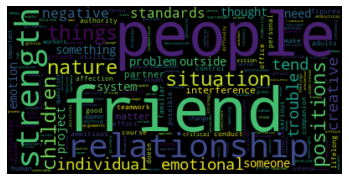

further matches:
216 with adventurers
194 with advocates
251 with defenders
217 with entertainers
201 with entrepreneurs
213 with executives
200 with logicians
240 with logisticians
206 with mediators
206 with protagonists
192 with virtuosos
213 with adventurers
221 with advocates
210 with architects
220 with campaigners
197 with commanders
*********************************************************
 
Libra and entertainers
254
Least matching personality was: 192 with adventurers


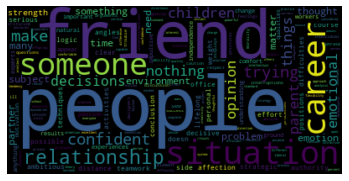

further matches:
215 with adventurers
210 with advocates
254 with entertainers
222 with entrepreneurs
195 with executives
212 with logicians
228 with logisticians
225 with mediators
199 with protagonists
211 with virtuosos
192 with adventurers
225 with advocates
199 with architects
230 with campaigners
210 with commanders
199 with consuls
*********************************************************
 
Scorpio and entrepreneurs
249
Least matching personality was: 195 with debaters


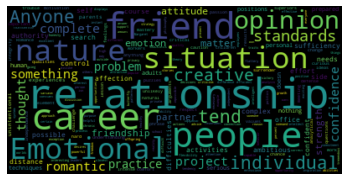

further matches:
205 with adventurers
209 with advocates
249 with entrepreneurs
227 with executives
209 with logicians
204 with logisticians
210 with mediators
219 with protagonists
203 with virtuosos
211 with adventurers
197 with advocates
229 with architects
204 with campaigners
214 with commanders
211 with consuls
195 with debaters
*********************************************************
 
Sagittarius and executives
227
Least matching personality was: 175 with logisticians


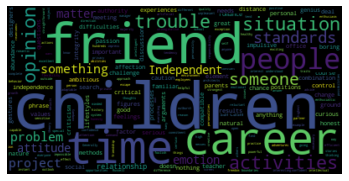

further matches:
201 with adventurers
189 with advocates
227 with executives
209 with logicians
175 with logisticians
181 with mediators
197 with protagonists
200 with virtuosos
203 with adventurers
199 with advocates
176 with architects
189 with campaigners
194 with commanders
195 with consuls
184 with debaters
194 with defenders
*********************************************************
 
Capricorn and logicians
227
Least matching personality was: 188 with advocates


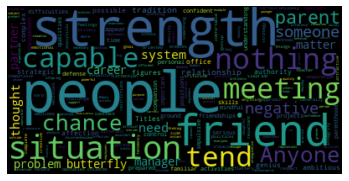

further matches:
191 with adventurers
188 with advocates
227 with logicians
217 with logisticians
205 with mediators
199 with protagonists
214 with virtuosos
208 with adventurers
188 with advocates
194 with architects
195 with campaigners
216 with commanders
213 with consuls
212 with debaters
197 with defenders
200 with entertainers
*********************************************************
 
Aquarius and logisticians
270
Least matching personality was: 206 with commanders


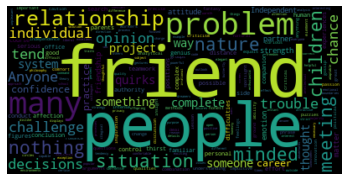

further matches:
213 with adventurers
215 with advocates
270 with logisticians
229 with mediators
211 with protagonists
216 with virtuosos
233 with adventurers
239 with advocates
214 with architects
232 with campaigners
206 with commanders
251 with consuls
212 with debaters
213 with defenders
206 with entertainers
210 with entrepreneurs
*********************************************************
 
Pisces and protagonists
236
Least matching personality was: 193 with virtuosos


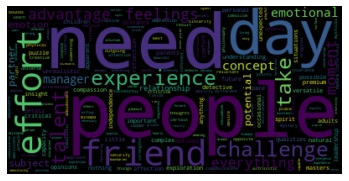

further matches:
207 with adventurers
222 with advocates
232 with mediators
236 with protagonists
193 with virtuosos
213 with adventurers
213 with advocates
228 with architects
198 with campaigners
216 with commanders
199 with consuls
229 with debaters
203 with defenders
235 with entertainers
207 with entrepreneurs
195 with executives
*********************************************************
 


In [279]:
pairs2 = []
currentpers = []
for sign in sign_bigrams.keys():

    common_words_number = []
    common_words = []
    
    for pers in pers_bigrams.keys():
        a = sign_bigrams[sign] + sign_adj_filt[sign] + sign_bigrams_jn[sign]\
        + sign_noun[sign] + signs_trigrams[sign] + sign_bigrams_vn[sign]
        b = pers_bigrams[pers] + pers_adj_filt[pers] + pers_bigrams_jn[pers]\
        + pers_noun[pers] + pers_trigrams[pers] + pers_bigrams_vn[pers]
        common = set(a) & set(b)
        number = len(set(a) & set(b))
        common_words_number.append(number)
        common_words.append((set(a) & set(b)))
        currentpers.append(pers)
        index = common_words_number.index(max(common_words_number))
        best_match = currentpers[index]
        best_match_adj = list(common_words[index])
        index2 = common_words_number.index(min(common_words_number))
        worst_match = currentpers[index2]

    for_cloud = '' 
    for i in range(0,len(best_match_adj)):
        if len(best_match_adj[i]) > 3:
            for_cloud += best_match_adj[i] + ' '
            


    print(sign ,'and', best_match)
    print(max(common_words_number))
    print('Least matching personality was:', min(common_words_number), 'with', worst_match )
    wordcloud = WordCloud().generate(for_cloud)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('further matches:')
    for i in range(0,len(common_words_number)):
        print(common_words_number[i], 'with', currentpers[i])
        
    print('*********************************************************')
    print(' ')
    currentpers.remove(best_match)
    pairs2.append(
    {
        "zodiac sign": sign,
        "personality type": best_match
        
        
        
    }
    )



### itt láthatóak a fenti módszerrel alkotott matchek:

#### ahogy ezt fent említettem, itt is látható hogy a találatok nem 100%-os megbízhatóságúak: az első listában a Virgo az adventurer és logistician párt kapja meg, míg a másodikban a defendert (tehát mindig a top3 match valamelyikét), és így tovább. (többen mindig ugyanazt a párt kapták)

In [283]:
print('személyiségtípusok szerint:')
print(' ')
print(pd.DataFrame(pairs))
print(' ')
print('csillagjegyek szerint:')
print(' ')
print(pd.DataFrame(pairs2))

személyiségtípusok szerint:
 
   personality type  zodiac sign
0       adventurers        Virgo
1         advocates        Aries
2        architects        Aries
3       campaigners       Taurus
4        commanders       Gemini
5           consuls       Cancer
6          debaters          Leo
7         defenders       Pisces
8      entertainers        Libra
9     entrepreneurs      Scorpio
10       executives  Sagittarius
11        logicians    Capricorn
12     logisticians        Virgo
13        mediators        Aries
14     protagonists        Libra
15        virtuosos       Taurus
 
csillagjegyek szerint:
 
   personality type  zodiac sign
0        architects        Aries
1       campaigners       Taurus
2        commanders       Gemini
3           consuls       Cancer
4          debaters          Leo
5         defenders        Virgo
6      entertainers        Libra
7     entrepreneurs      Scorpio
8        executives  Sagittarius
9         logicians    Capricorn
10     logisticians

### 'vizuális érdekesség'ként ábrázoltam a 20 leggyakoribb jellemző gyakoriságát, ill. elhelyezkedését a szövegben:

Aries


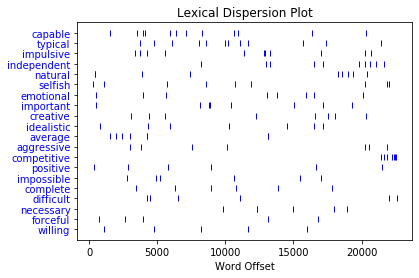

Taurus


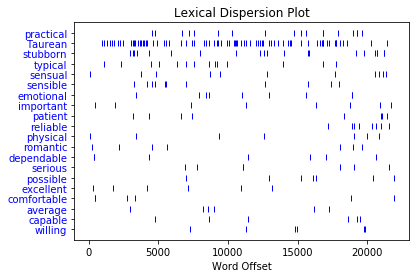

Gemini


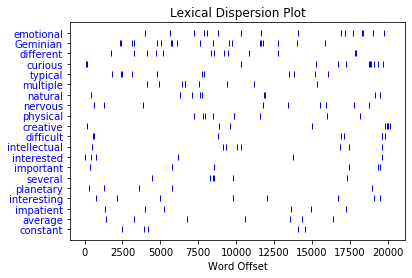

Cancer


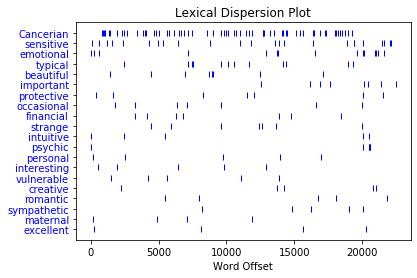

Leo


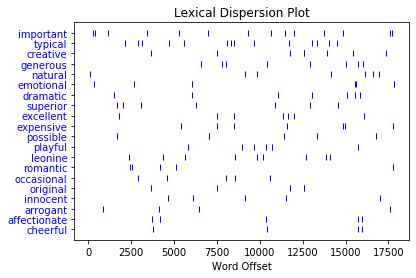

Virgo


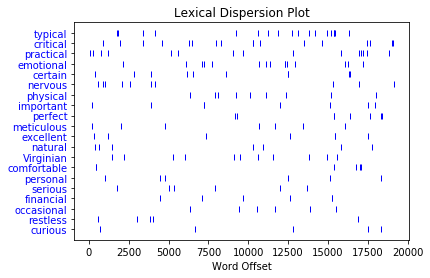

Libra


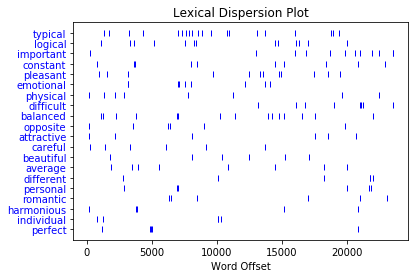

Scorpio


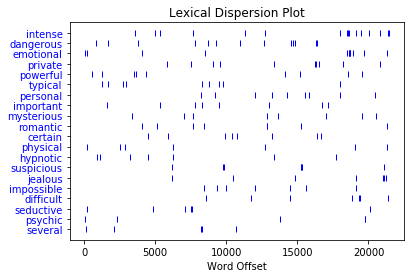

Sagittarius


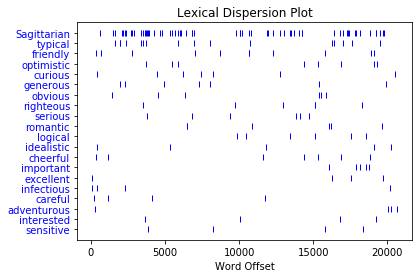

Capricorn


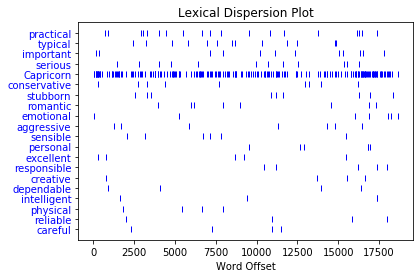

Aquarius


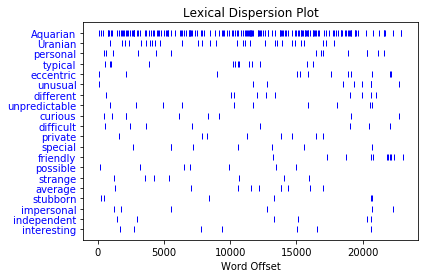

Pisces


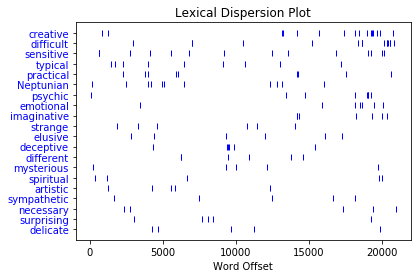

In [284]:
for sign in sign_adj_filt.keys():
    fdist = nltk.FreqDist(nltk.Text(sign_adj_filt[sign])).most_common(20)
    adjectives = []
    for i in range(0,len(fdist)):
        adjectives.append(fdist[i][0])
    print(sign)
    dict_of_signs_lemma[sign].dispersion_plot(adjectives)

adventurers


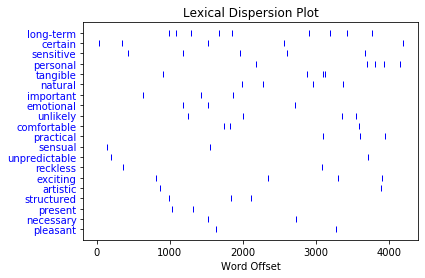

advocates


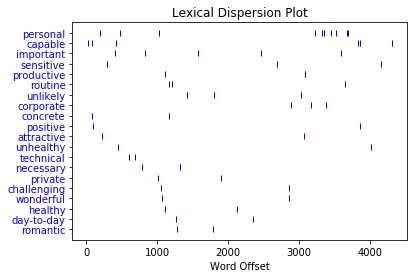

architects


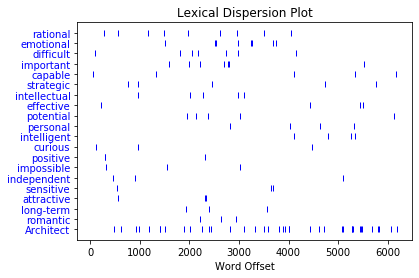

campaigners


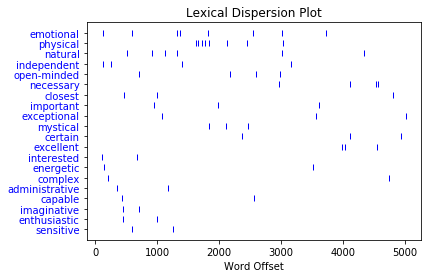

commanders


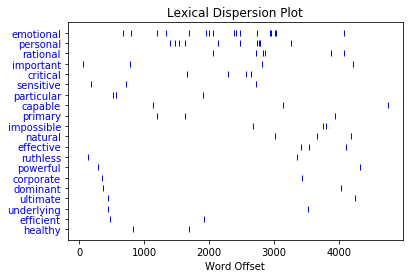

consuls


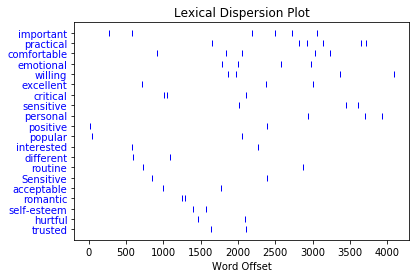

debaters


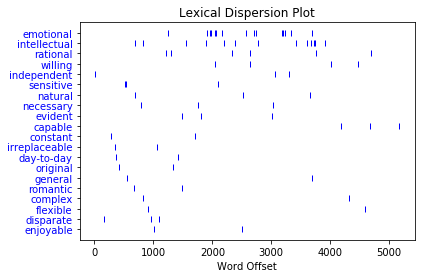

defenders


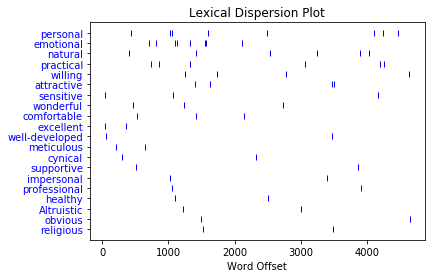

entertainers


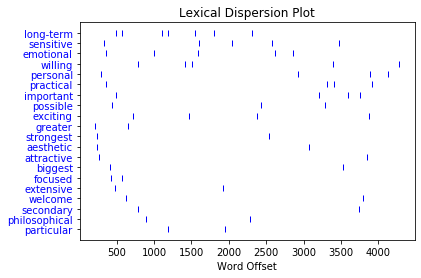

entrepreneurs


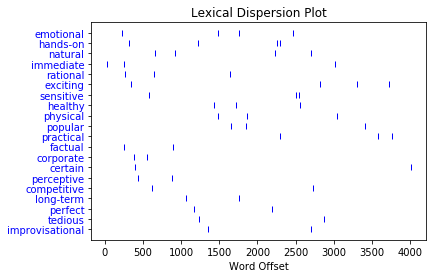

executives


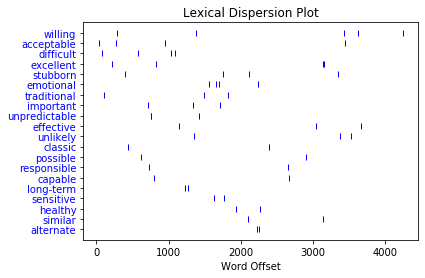

logicians


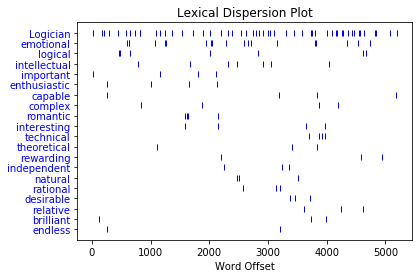

logisticians


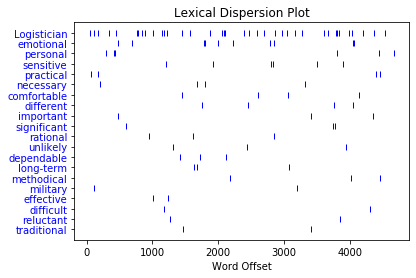

mediators


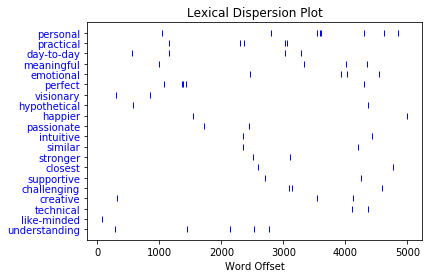

protagonists


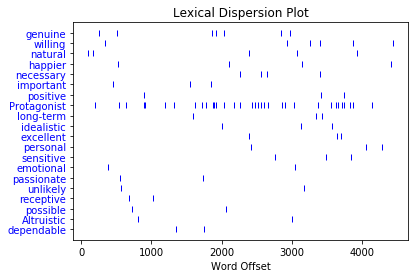

virtuosos


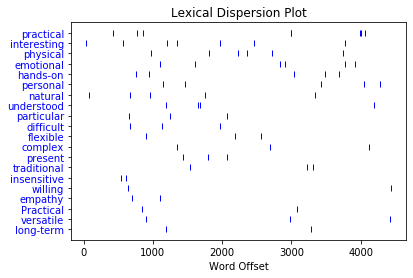

In [285]:
for pers in pers_adj_filt.keys():
    fdist = nltk.FreqDist(nltk.Text(pers_adj_filt[pers])).most_common(20)
    adjectives = []
    for i in range(0,len(fdist)):
        adjectives.append(fdist[i][0])
    print(pers)
    dict_of_pers_lemma[pers].dispersion_plot(adjectives)